# Forward & Backward Filling

In [2]:
import pandas as pd
import seaborn as sns
sns.set_context("talk")

In [3]:
df = pd.read_csv(
    "../Datasets/example_retail_sales_with_missing_data.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)
df.head()

,y
ds,
1992-01-01,146376.0
1992-02-01,147079.0
1992-03-01,159336.0
1992-04-01,163669.0
1992-05-01,170068.0


In [4]:
#####################  Check for missing data ###################

n_missing = df["y"].isnull().sum()

print(f"Number of datapoints missing: {n_missing}")
print(f"Proportion of dataset missing: {n_missing/len(df):.2%}")

Number of datapoints missing: 33
Proportion of dataset missing: 20.62%


In [ ]:
ax = df.plot(marker=".", figsize=[10, 5], legend=None)
ax.set_title("Retail Sales with missing data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

C:\Users\Tharindu\AppData\Local\Temp\ipykernel_126592\746692579.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed = df.fillna(method="ffill")


Text(0.5, 0, 'Time')

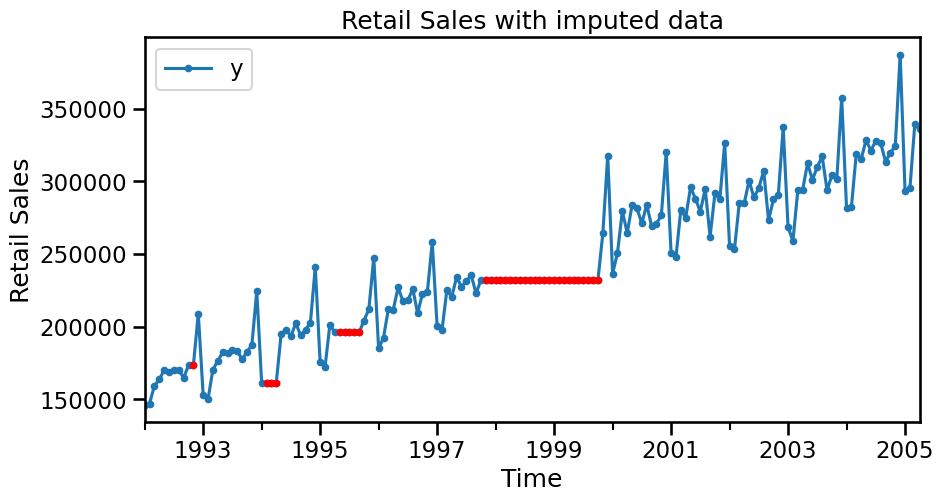

In [5]:
######## Forward fill (last observation carries forward)
# Apply the forward fill method
df_imputed = df.fillna(method="ffill")

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

C:\Users\Tharindu\AppData\Local\Temp\ipykernel_126592\2365858489.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed = df.fillna(method="bfill")


Text(0.5, 0, 'Time')

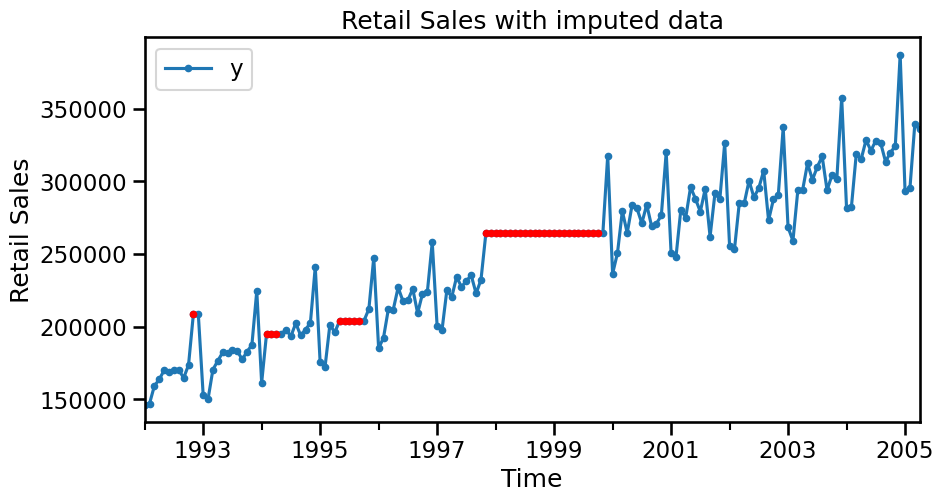

In [6]:
############## Backward Fill (next observation carried backward)
# Apply the backfill method
df_imputed = df.fillna(method="bfill")

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

# Linear &  Spline Interpolation 

In [7]:
df = pd.read_csv(
    "../Datasets/example_retail_sales_with_missing_data.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)
df.head()

,y
ds,
1992-01-01,146376.0
1992-02-01,147079.0
1992-03-01,159336.0
1992-04-01,163669.0
1992-05-01,170068.0


In [8]:
n_missing = df["y"].isnull().sum()
print(f"Number of datapoints missing: {n_missing}")
print(f"Proportion of dataset missing: {n_missing/len(df):.2%}")

Number of datapoints missing: 33
Proportion of dataset missing: 20.62%


Text(0.5, 0, 'Time')

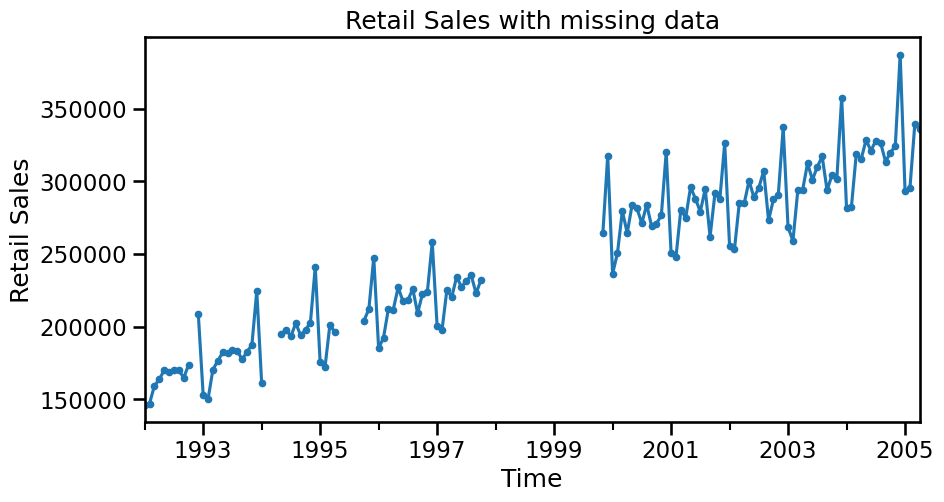

In [9]:
ax = df.plot(marker=".", figsize=[10, 5], legend=None)
ax.set_title("Retail Sales with missing data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

In [ ]:
#################  Linear Interpolation #################### 
# Apply the linear interpolation method
# Note: If the time intervals between rows are not uniform then
# the method should be set as 'time' to achieve a linear fit.
df_imputed = df.interpolate(method="linear")

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], legend=None)
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

# Apply the linear interpolation method
# Note: If the time intervals between rows are not uniform then
# the method should be set as 'time' to achieve a linear fit.
df_imputed = df.interpolate(method="time")

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], legend=None)
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")



Text(0.5, 0, 'Time')

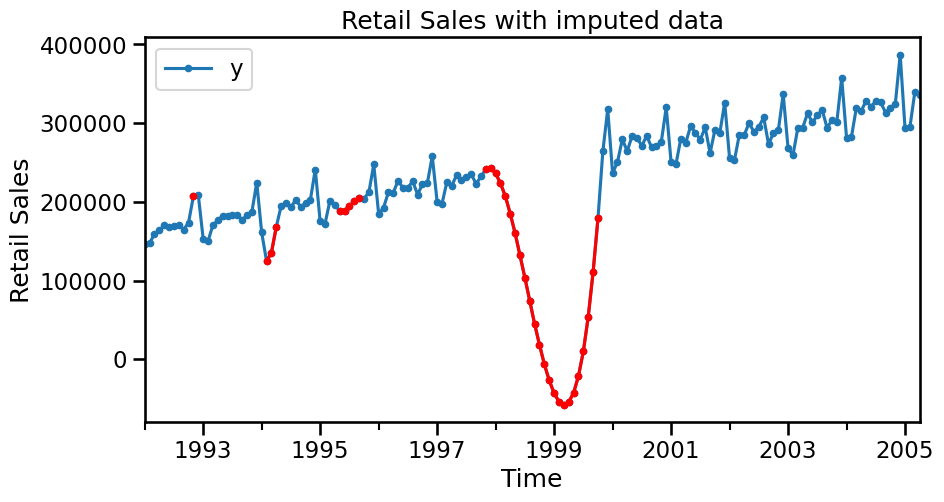

In [10]:
##################   Spline Interpolation ##########################
'''
Typically the order parameter is relatively low when using splines, 3 is common. This is because higher order splines will begin fitting more complex or larger magnitude curves between missing values.

Note: Splines are generally preferred to polynomial interpolation. This is because splines are less sensitive than a polynomial fit to small changes to the data points that they are fitting.

****** cubic splines are not appropriate when there are large gaps in the data.
'''


# Apply the spline interpolation method
df_imputed = df.interpolate(method="spline", order=3)

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

# Impute missing data using seasonal decomposition and interpolation.

In [11]:
df = pd.read_csv(
    "../Datasets/example_retail_sales_with_missing_data.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)
df.head()

,y
ds,
1992-01-01,146376.0
1992-02-01,147079.0
1992-03-01,159336.0
1992-04-01,163669.0
1992-05-01,170068.0


In [12]:
################## Check for missing data #############
n_missing = df["y"].isnull().sum()

print(f"Number of datapoints missing: {n_missing}")
print(f"Proportion of dataset missing: {n_missing/len(df):.2%}")

Number of datapoints missing: 33
Proportion of dataset missing: 20.62%


Text(0.5, 0, 'Time')

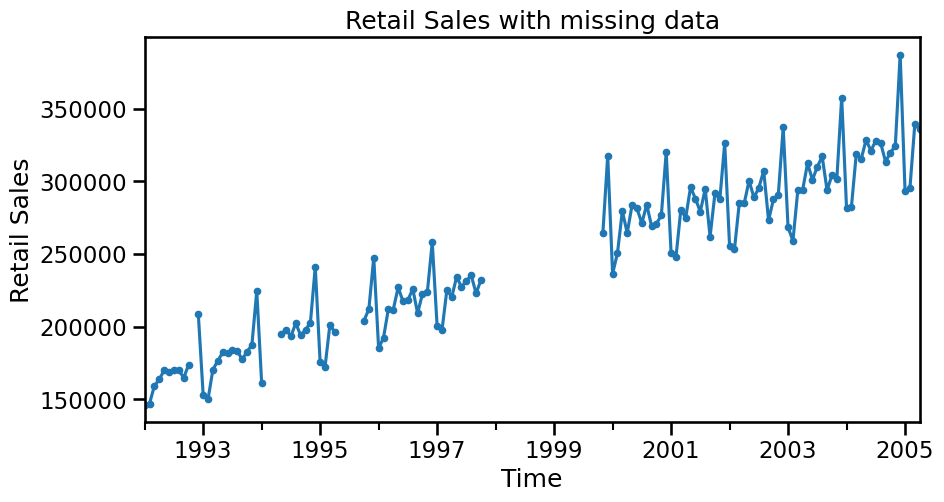

In [13]:
ax = df.plot(marker=".", figsize=[10, 5], legend=None)

ax.set_title("Retail Sales with missing data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

## Seasonal-Trend decomposition using LOESS (STL)

* This method involves estimating the seasonal component of a time series. This is then subtracted from the original time series to provide a de-seasoned time series. Any of the prior interpolation methods can then be used on the de-seasoned time series and the seasonal component can be added back to the de-seasoned time series.

* There are many different methods to decompose a time series into seasonal and other components. We shall use STL for this notebook.

* In this section we show how to use the STL method to extract the seasonal component of a time series. An advantage of STL is that it is able to estimate a seasonal component which can change over time (e.g., if the amplitude or frequency of the seasonal component changes).

* There is a paper called Imputation inside the papers folder 

In [14]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

In [16]:
# Apply STL decomposition
res = STL(df.interpolate(method="linear").squeeze(), # Convert dataframe to a Series 
                                                     # to avoid error in Statsmodels
          seasonal=31).fit()

In [17]:
'''The seasonal parameter determines how much data is used to infer the seasonality at any given point. If the seasonal component is thought to be fixed throughout time then a large seasonal parameter can be set so that more data is used to determine the seasonal component. Likewise if the seasonal component is thought to change (e.g., the frequency) quickly over time the seasonal parameter can be reduced so that only recent data contributes to determining the seasonal component.

The large missing gap is linearly interpolated. This means that the algorithm sees a region of data with no seasonal component and could distort the estimation of the seasonal component. A large seasonal parameter is set to overcome this. This works because a larger portion of the data is now used to estimate the seasonal component meaning that the local distortion from the interpolation has less effect.

We now plot the decomposition to inspect that it is reasonable.'''

'The seasonal parameter determines how much data is used to infer the seasonality at any given point. If the seasonal component is thought to be fixed throughout time then a large seasonal parameter can be set so that more data is used to determine the seasonal component. Likewise if the seasonal component is thought to change (e.g., the frequency) quickly over time the seasonal parameter can be reduced so that only recent data contributes to determining the seasonal component.\n\nThe large missing gap is linearly interpolated. This means that the algorithm sees a region of data with no seasonal component and could distort the estimation of the seasonal component. A large seasonal parameter is set to overcome this. This works because a larger portion of the data is now used to estimate the seasonal component meaning that the local distortion from the interpolation has less effect.\n\nWe now plot the decomposition to inspect that it is reasonable.'

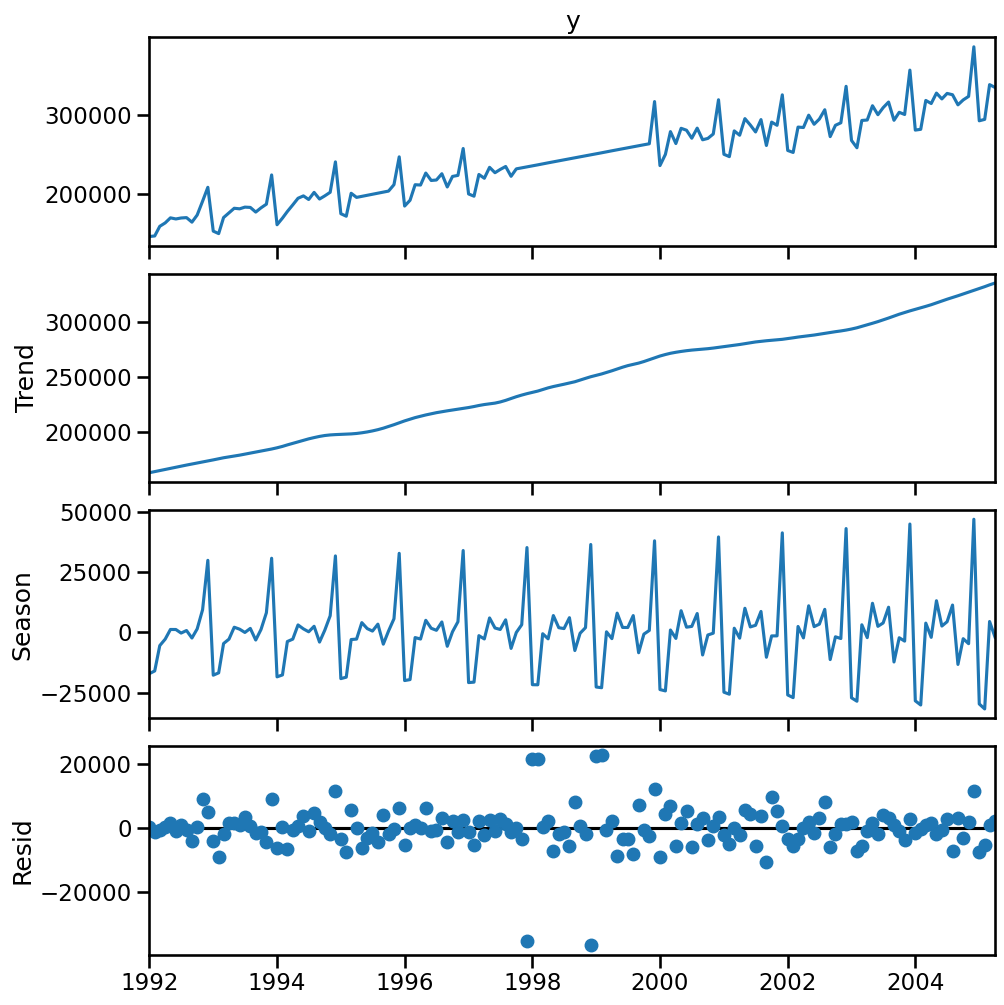

In [18]:
plt.rc("figure", figsize=(10, 10))
plt.rc("font", size=5)
res.plot();

In [20]:
'''We now:

extract the seasonal component
de-seasonalise the original time series
perform linear interpolation on the de-seasonalised data
Add the seasonal component back to the imputed de-seasonalised data  '''

'We now:\n\nextract the seasonal component\nde-seasonalise the original time series\nperform linear interpolation on the de-seasonalised data\nAdd the seasonal component back to the imputed de-seasonalised data  '

In [23]:
# Extract seasonal component
seasonal_component = res.seasonal
seasonal_component.head()

ds
1992-01-01   -17093.246676
1992-02-01   -15953.208314
1992-03-01    -5465.127087
1992-04-01    -2786.956191
1992-05-01     1205.808675
Name: season, dtype: float64

Text(0.5, 0, 'Time')

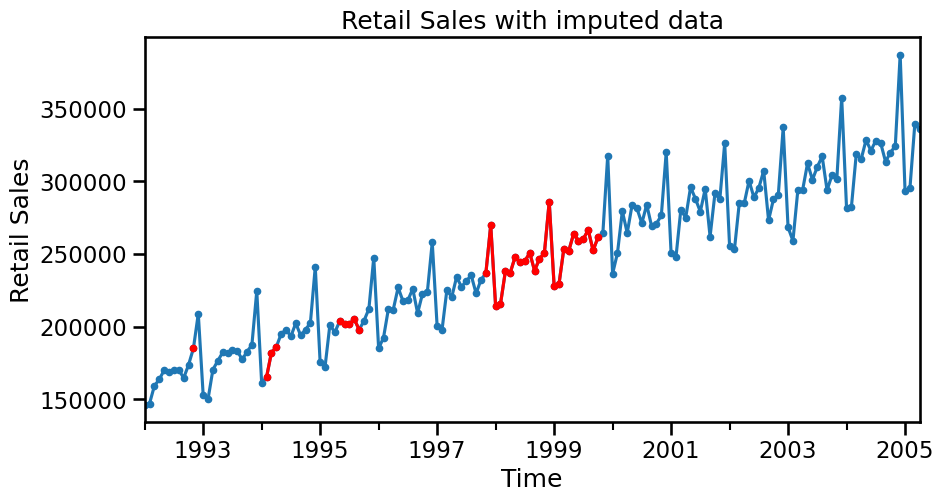

In [24]:
# De-seasonlise original data
df_deseasonalised = df["y"] - seasonal_component

# Perform linear interpolation on de-seasonalised data
df_deseasonalised_imputed = df_deseasonalised.interpolate(method="linear")

# Add seasonal component back to get the final imputed time series
df_imputed = df_deseasonalised_imputed + seasonal_component

# Plot the imputed time series
df_imputed = df_imputed.to_frame().rename(columns={0: "y"})
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], legend=None)
ax = df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

Text(0.5, 0, 'Time')

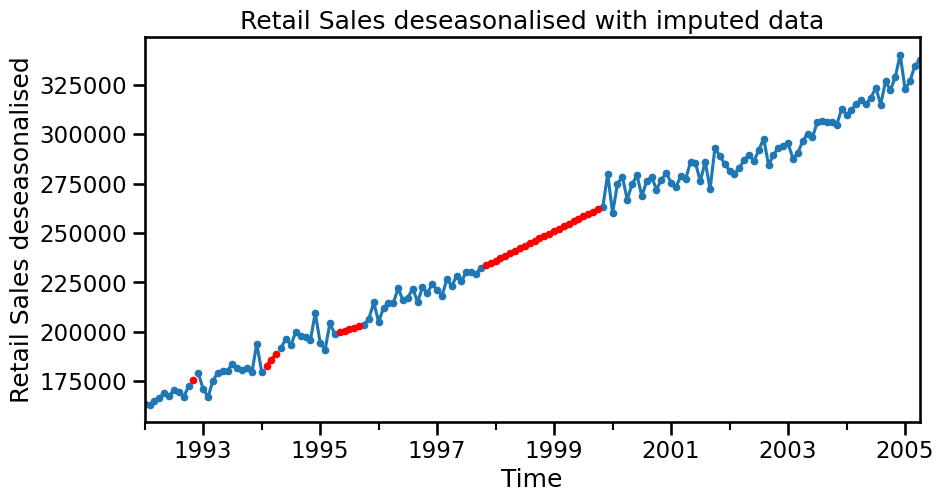

In [25]:
ax = df_deseasonalised.plot(linestyle="-", marker=".", figsize=[10, 5])

df_deseasonalised_imputed.to_frame().rename(columns={0: "y"})[df.isnull()].plot(
    ax=ax, legend=None, marker=".", color="r"
)


ax.set_title("Retail Sales deseasonalised with imputed data")
ax.set_ylabel("Retail Sales deseasonalised")
ax.set_xlabel("Time")

# Summary 

* If your dataset is not strongly seasonal then simple methods such as forward fill or linear interpolation would normally be sufficient. If your data is strongly seasonal and especially if there are large gaps then performing a seasonal decomposition and interpolating the de-seasonalised data is recommended.